# Deep Learning Models - Introduction
Sumudu Tennakoon, PhD

To learn more about Python, refeer to the following websites

* Python : www.python.org

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* TensorFlow: https://www.tensorflow.org/
* Keras: https://keras.io/

### If you use Google Colab, switch to Hardware Accelerator to GPU or TPU to get a runtime perormance boost.
* Runtime > Change Runtime Type >
* 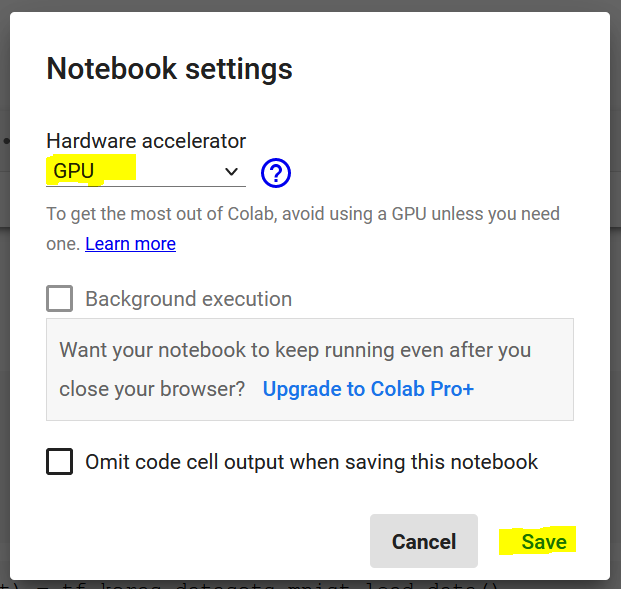

# Download MNIST Dataset
- https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png
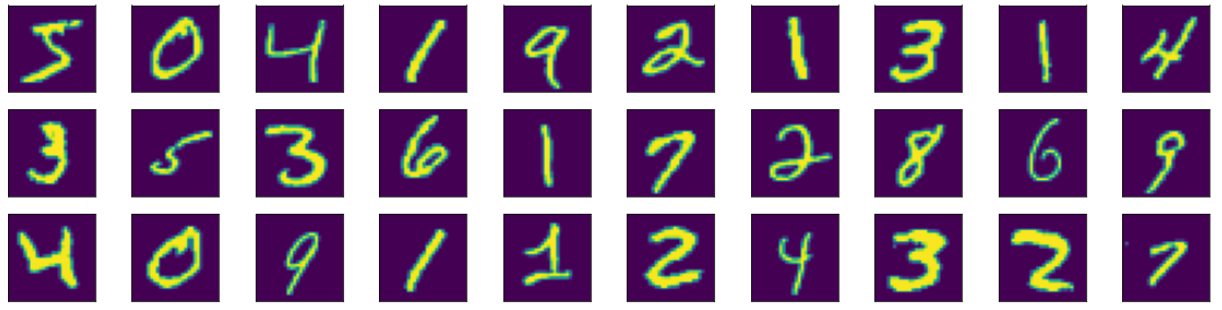

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
import seaborn as sns

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

## Dataset Size (images, x_pixels, y_pixels)

In [ ]:
print("Test Dataset:", X_test.shape)
print("Train Dataset:", X_train.shape)

## Single Image (x_pixels, y_pixels)

In [ ]:
X_test[0].shape 

## Array Represntation of Image (Pixel Color Value in the range [0, 255])

In [ ]:
X_test[0]

## Visualize Image

In [ ]:
pyplot.imshow(X_test[0])
pyplot.colorbar()
print("Number = ", y_test[0])

## Normalize Image Data

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

pyplot.imshow(X_test[0])
pyplot.colorbar()
print("Number = ", y_test[0])

# Image Labels (y variable/target variable)

In [ ]:
y_train

In [ ]:
np.unique(y_train)

In [ ]:
len(np.unique(y_train))

In [ ]:
print("y_test:", y_test.shape)
print("y_train:", y_train.shape)

# Create Feed Forward Model 

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

print(model.summary())

# Compile Model

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)


# Fit Model

In [ ]:
# Fit model
hist = model.fit(X_train, y_train,
                batch_size=128,
                epochs=10,
                verbose=1,
                validation_data=(X_test, y_test))

# Model Fitting History

In [ ]:
fit_history = pd.DataFrame(hist.history)
fit_history.head()

In [ ]:
fit_history[['loss', 'val_loss' ]].plot()

In [ ]:
fit_history[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy' ]].plot()

# Evaluate Model

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)    
print(model.summary())
print('train samples:', X_train.shape[0])
print('test samples:', X_test.shape[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
test_predictions = model.predict(X_test)   
test_predictions

In [ ]:
test_predictions = np.argmax(test_predictions, axis=1)
test_predictions

## Confusion Matrix

In [ ]:
test_result = pd.DataFrame({'y_act': y_test, 'y_pred':test_predictions})
test_result.sample(5)

In [ ]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

In [ ]:
pyplot.figure(figsize=(16,8))
sns.heatmap(pd.crosstab(test_result.y_act, test_result.y_pred, margins=False), annot=True, cmap="YlGnBu", fmt=".0f")

# Convolution Neural Network (CNN) Model

## Load Dataset and Normalize

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

pyplot.imshow(X_test[0])
pyplot.colorbar()
print("Number = ", y_test[0])

## Transform image data into single channel (monochrome)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
print("Test Dataset:", X_test.shape)
print("Train Dataset:", X_train.shape)

### One-hot encode y variable

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train

In [ ]:
print("y_test:", y_test.shape)
print("y_train:", y_train.shape)

## CNN Model

In [ ]:
input_shape = (28, 28, 1)
num_classes = 10

model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.summary()


In [ ]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split=0.1, 
          validation_data=(X_test, y_test))


## Evaluate Model

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)    
print(model.summary())
print('train samples:', X_train.shape[0])
print('test samples:', X_test.shape[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Confusion Matrix

In [ ]:
test_predictions = model.predict(X_test)   
test_predictions

In [ ]:
# Decide the class based on the class with maxiumum predicted value.
test_predictions = np.argmax(test_predictions, axis=1)
test_predictions

In [ ]:
# Convert One hot encoded y column to categorical column
y_test = np.argmax(y_test, axis=1)
y_test

In [ ]:
test_result = pd.DataFrame({'y_act': y_test, 'y_pred':test_predictions})
test_result.sample(5)

In [ ]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

<hr>
Last update 2022-06-30 by Sumudu Tennakoon

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.